In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("default of credit card clients.xls", header=1)

df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#Categorical Variables :
SEX (Only Male as TRUE and FALSE)
EDUCATION
MARRIAGE

In [3]:
#Print nan values in each column
print(df.isna().sum())
print()
#Class priors
print(df['default payment next month'].value_counts(normalize=True))
print()


#Binary Encoding for SEX
df['SEX_MALE'] = (df['SEX'] == 1)
df = df.drop('SEX', axis=1)

#One Hot Encoding for EDUCATION and MARRIAGE
df = pd.get_dummies(df, columns=['EDUCATION', 'MARRIAGE'], drop_first=True)
df.head(5)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64



,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_MALE,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,False,False,True,False,False,False,False,True,False,False
1,2,120000,26,-1,2,0,0,0,2,2682,...,False,False,True,False,False,False,False,False,True,False
2,3,90000,34,0,0,0,0,0,0,29239,...,False,False,True,False,False,False,False,False,True,False
3,4,50000,37,0,0,0,0,0,0,46990,...,False,False,True,False,False,False,False,True,False,False
4,5,50000,57,-1,0,-1,0,0,0,8617,...,True,False,True,False,False,False,False,True,False,False


In [4]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

from sklearn.model_selection import train_test_split

#Standardize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Train 70%, Test 20%, Validation 10%
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Validation set size:", X_val.shape)

Train set size: (21000, 31)
Test set size: (6000, 31)
Validation set size: (3000, 31)


In [5]:
#Train Logistic Regression Model and Decision Tree Model and SVM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
log_reg = LogisticRegression(max_iter=1000, random_state=100)
dec_tree = DecisionTreeClassifier(random_state=100)
svm = SVC(random_state=100)
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)


#Evaluate Models on Validation Set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model, X_val, y_val):
	y_pred = model.predict(X_val)
	accuracy = accuracy_score(y_val, y_pred)
	precision = precision_score(y_val, y_pred)
	recall = recall_score(y_val, y_pred)
	f1 = f1_score(y_val, y_pred)
	return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(log_reg, X_val, y_val)
dec_tree_metrics = evaluate_model(dec_tree, X_val, y_val)
svm_metrics = evaluate_model(svm, X_val, y_val)

print("Logistic Regression - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*log_reg_metrics))
print("Decision Tree - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*dec_tree_metrics))
print("SVM - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*svm_metrics))

Logistic Regression - Accuracy: 0.8133, Precision: 0.7031, Recall: 0.2711, F1-Score: 0.3913
Decision Tree - Accuracy: 0.7183, Precision: 0.3835, Recall: 0.4488, F1-Score: 0.4136
SVM - Accuracy: 0.8210, Precision: 0.6896, Recall: 0.3479, F1-Score: 0.4625


#Dropping columns with weights between 0.1 and -0.1

In [6]:
#Get weights of Logistic Regression Model
log_reg_weights = pd.Series(log_reg.coef_[0], index=X_train.columns)
print("Logistic Regression Weights:")
print(log_reg_weights.sort_values(ascending=False))

#Remove weight between 0.1 and -0.1
log_reg_weights_filtered = log_reg_weights[(log_reg_weights > 0.1) | (log_reg_weights < -0.1)]
print("Filtered Logistic Regression Weights:")
print(log_reg_weights_filtered.sort_values(ascending=False))

#Drop features with weights between 0.1 and -0.1 and retrain Logistic Regression Model
features_to_keep = log_reg_weights_filtered.index
X_train_reduced = X_train[features_to_keep]
X_val_reduced = X_val[features_to_keep]
log_reg_reduced = LogisticRegression(max_iter=1000, random_state=100)
log_reg_reduced.fit(X_train_reduced, y_train)

log_reg_reduced_metrics = evaluate_model(log_reg_reduced, X_val_reduced, y_val)

print("Reduced Logistic Regression - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*log_reg_reduced_metrics))

Logistic Regression Weights:
PAY_0          0.673071
EDUCATION_1    0.426017
EDUCATION_2    0.332127
EDUCATION_3    0.268849
MARRIAGE_3     0.144646
BILL_AMT3      0.126881
PAY_3          0.118330
MARRIAGE_1     0.115215
SEX_MALE       0.099361
PAY_2          0.096504
BILL_AMT4      0.061387
AGE            0.052322
BILL_AMT5      0.047812
PAY_4          0.033392
PAY_5          0.018120
ID             0.000535
PAY_6         -0.003431
BILL_AMT6     -0.008839
PAY_AMT3      -0.021262
PAY_AMT5      -0.025698
BILL_AMT2     -0.030140
PAY_AMT6      -0.032621
MARRIAGE_2    -0.045035
EDUCATION_6   -0.067326
PAY_AMT4      -0.074068
LIMIT_BAL     -0.117745
PAY_AMT1      -0.184356
PAY_AMT2      -0.233435
BILL_AMT1     -0.309738
EDUCATION_4   -0.858042
EDUCATION_5   -0.988625
dtype: float64
Filtered Logistic Regression Weights:
PAY_0          0.673071
EDUCATION_1    0.426017
EDUCATION_2    0.332127
EDUCATION_3    0.268849
MARRIAGE_3     0.144646
BILL_AMT3      0.126881
PAY_3          0.118330
MARRIA

Logistic Regression - Confusion Matrix:
 [[2260   76]
 [ 484  180]]
Logistic Regression - ROC-AUC: 0.7243
Decision Tree - Confusion Matrix:
 [[1857  479]
 [ 366  298]]
Decision Tree - ROC-AUC: 0.6219


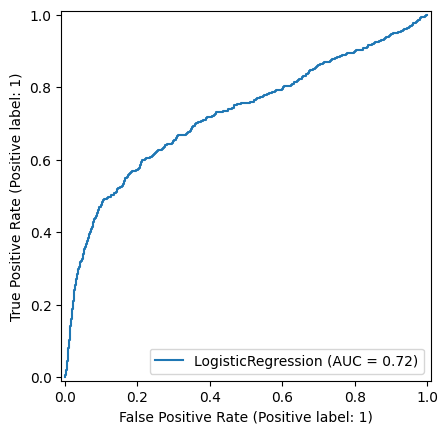

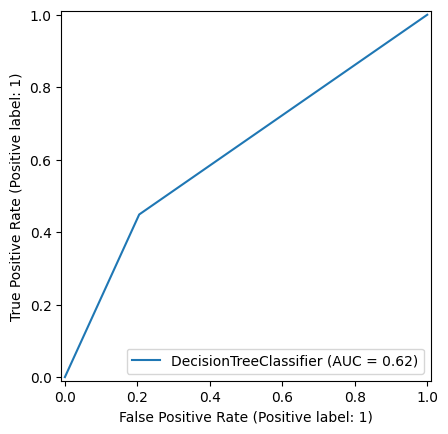

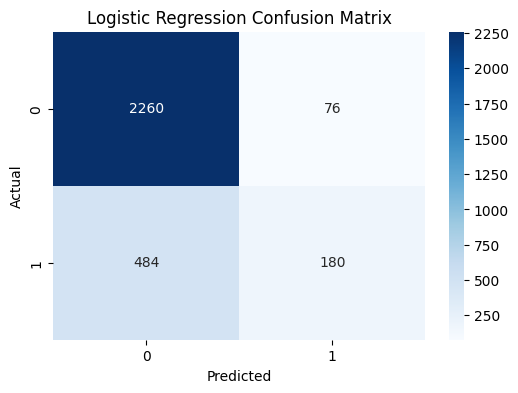

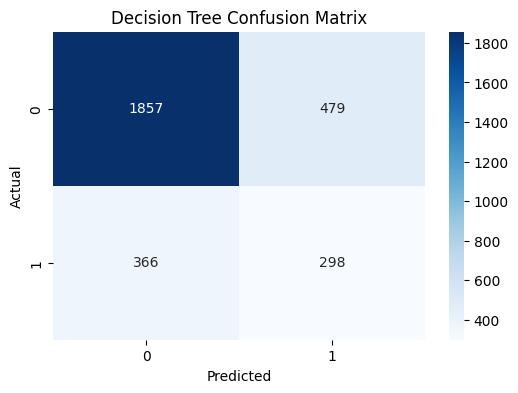

In [7]:
#Additional Evaluation on Validation Set - Confusion Matrix and ROC-AUC
from sklearn.metrics import confusion_matrix, roc_auc_score, RocCurveDisplay

def additional_evaluation(model, X_val, y_val):
	y_pred = model.predict(X_val)
	y_proba = model.predict_proba(X_val)[:, 1]
	cm = confusion_matrix(y_val, y_pred)
	roc_auc = roc_auc_score(y_val, y_proba)
	RocCurveDisplay.from_estimator(model, X_val, y_val)
	return cm, roc_auc

log_reg_cm, log_reg_roc_auc = additional_evaluation(log_reg, X_val, y_val)
dec_tree_cm, dec_tree_roc_auc = additional_evaluation(dec_tree, X_val, y_val)

print("Logistic Regression - Confusion Matrix:\n", log_reg_cm)
print("Logistic Regression - ROC-AUC: {:.4f}".format(log_reg_roc_auc))
print("Decision Tree - Confusion Matrix:\n", dec_tree_cm)
print("Decision Tree - ROC-AUC: {:.4f}".format(dec_tree_roc_auc))

#Also display confusion matrix and ROC-AUC using seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title):
	plt.figure(figsize=(6, 4))
	sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
	plt.title(title)
	plt.xlabel('Predicted')
	plt.ylabel('Actual')
	plt.show()
 
plot_confusion_matrix(log_reg_cm, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(dec_tree_cm, "Decision Tree Confusion Matrix")

Random Forest - Accuracy: 0.8203, Precision: 0.6632, Recall: 0.3825, F1-Score: 0.4852
Voting Classifier - Accuracy: 0.7183, Precision: 0.3835, Recall: 0.4488, F1-Score: 0.4136
Voting Classifier 2 - Accuracy: 0.8197, Precision: 0.6977, Recall: 0.3268, F1-Score: 0.4451
AdaBoost - Accuracy: 0.7220, Precision: 0.3867, Recall: 0.4367, F1-Score: 0.4102
Random Forest - Confusion Matrix:
 [[2207  129]
 [ 410  254]]
Random Forest - ROC-AUC: 0.7830
Voting Classifier - Confusion Matrix:
 [[1857  479]
 [ 366  298]]
Voting Classifier - ROC-AUC: 0.7173
Voting Classifier 2 - Confusion Matrix:
 [[2242   94]
 [ 447  217]]
Voting Classifier 2 - ROC-AUC: 0.7286
AdaBoost - Confusion Matrix:
 [[1876  460]
 [ 374  290]]
AdaBoost - ROC-AUC: 0.6199


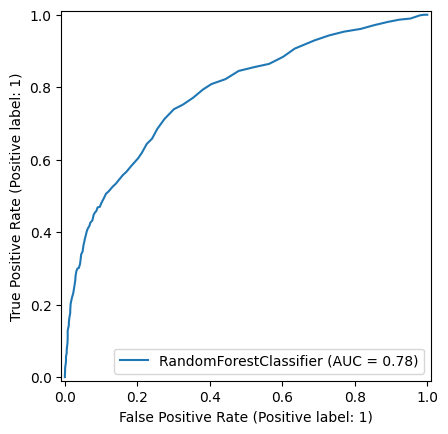

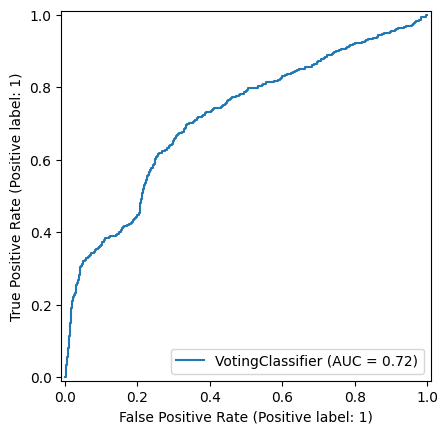

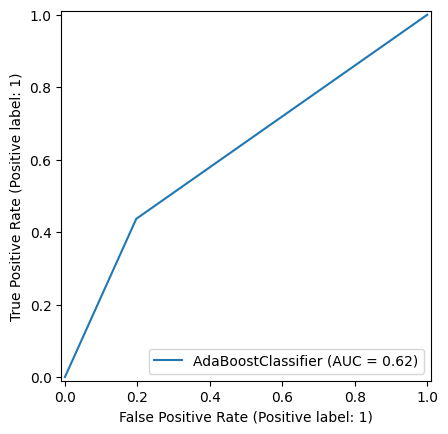

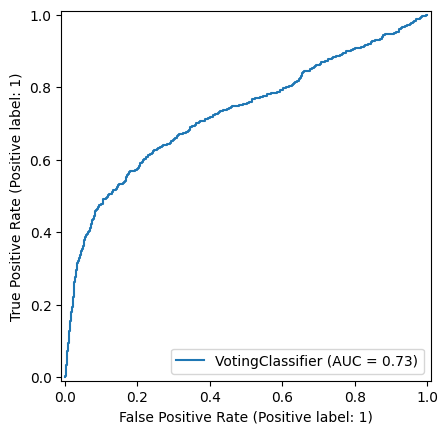

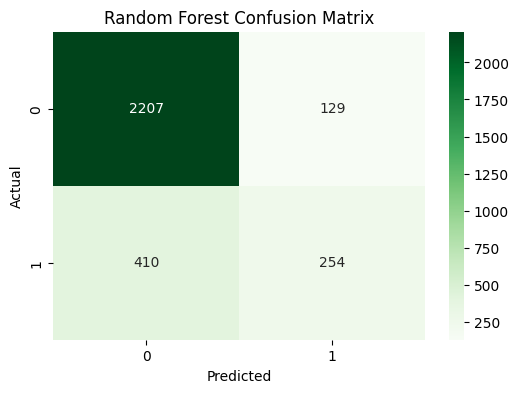

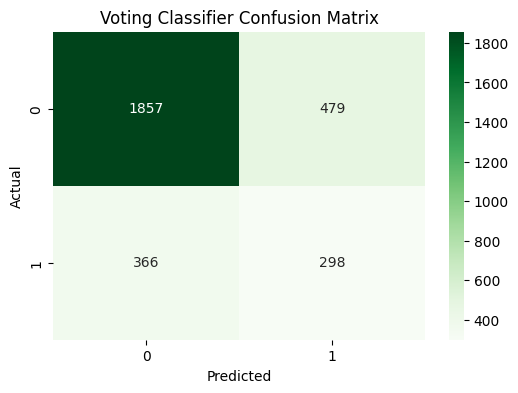

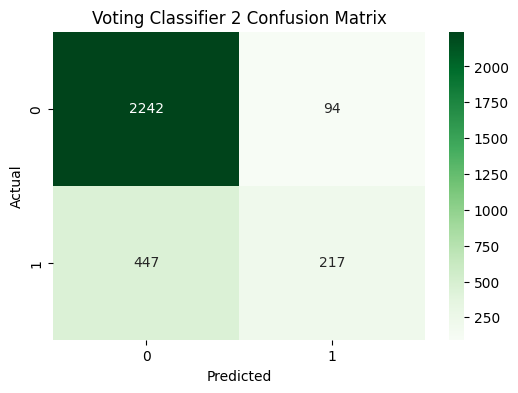

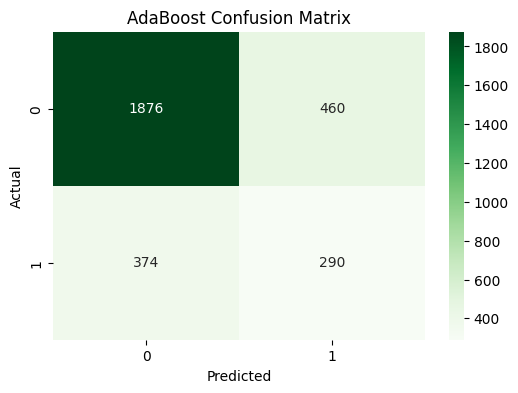

In [8]:
#Ensemble Model (Random Forest, ensemble of Logistic Regression and Decision Tree, AdaBoost)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=100)
voting_clf = VotingClassifier(estimators=[('log_reg', log_reg), ('dec_tree', dec_tree)], voting='soft')
#Ensemble of logistic regression and svm
svm_clf = SVC(probability=True, random_state=100)
voting_clf_2 = VotingClassifier(estimators=[('log_reg', log_reg), ('svm', svm_clf)], voting='soft')

ada_clf = AdaBoostClassifier(estimator=dec_tree, n_estimators=50, random_state=100)

rf_clf.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)
voting_clf_2.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

rf_clf_metrics = evaluate_model(rf_clf, X_val, y_val)
voting_clf_metrics = evaluate_model(voting_clf, X_val, y_val)
voting_clf_2_metrics = evaluate_model(voting_clf_2, X_val, y_val)
ada_clf_metrics = evaluate_model(ada_clf, X_val, y_val)

print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*rf_clf_metrics))
print("Voting Classifier - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*voting_clf_metrics))
print("Voting Classifier 2 - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*voting_clf_2_metrics))
print("AdaBoost - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(*ada_clf_metrics))

#Additional Evaluation for Ensemble Models
rf_cm, rf_roc_auc = additional_evaluation(rf_clf, X_val, y_val)
voting_cm, voting_roc_auc = additional_evaluation(voting_clf, X_val, y_val)
ada_cm, ada_roc_auc = additional_evaluation(ada_clf, X_val, y_val)
print("Random Forest - Confusion Matrix:\n", rf_cm)
print("Random Forest - ROC-AUC: {:.4f}".format(rf_roc_auc))
print("Voting Classifier - Confusion Matrix:\n", voting_cm)
print("Voting Classifier - ROC-AUC: {:.4f}".format(voting_roc_auc))
voting_2_cm, voting_2_roc_auc = additional_evaluation(voting_clf_2, X_val, y_val)
print("Voting Classifier 2 - Confusion Matrix:\n", voting_2_cm)
print("Voting Classifier 2 - ROC-AUC: {:.4f}".format(voting_2_roc_auc))
print("AdaBoost - Confusion Matrix:\n", ada_cm)
print("AdaBoost - ROC-AUC: {:.4f}".format(ada_roc_auc))

def plot_ensemble_confusion_matrix(cm, title):
	plt.figure(figsize=(6, 4))
	sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
	plt.title(title)
	plt.xlabel('Predicted')
	plt.ylabel('Actual')
	plt.show()
 
plot_ensemble_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
plot_ensemble_confusion_matrix(voting_cm, "Voting Classifier Confusion Matrix")
plot_ensemble_confusion_matrix(voting_2_cm, "Voting Classifier 2 Confusion Matrix")
plot_ensemble_confusion_matrix(ada_cm, "AdaBoost Confusion Matrix")
